## Springboard Data Science Capstone Two 
## 2. Data Wrangling

In this part of the capstone, we'll import, review, clean and prepare the data for the explanatory data analysis in the next phase. Due to the large sizes of the data, they'll not be pushed to the github. They can be accessed at https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv.


### 2.1 Import & Review the Data

First, let's import the data and take a close look at them.


In [48]:
# Import pandasa, os, and matplotlib.pyplot modules.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Import data.

df_flight = pd.read_csv('flights.csv')
df_airport = pd.read_csv('airports.csv')
df_airline = pd.read_csv('airlines.csv')

C:\Users\wfgyi\AppData\Local\Temp\ipykernel_22944\3906611510.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv('flights.csv')


In [50]:
df_flight.info()
df_airport.info()
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### 2.2 Explore, Clean & Prepare the Data

Now, let's take a look at the entries with null value.

In [51]:
df_flight.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

The cancellation reason and delay reason columns contain a significant amount of NaN values.  If we are interested to investigate the reasons for flight delays and cancellations, then these columns will be of great use to us.  However, our goal here is to find the impact, if any, of airports, airlines and flights on flight delays and cancellations.  These columns are not relevant to what we want to find out, and therefore can be dropped.


In [52]:
# Drop the cancellation reason and delay reason columns.

col = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(col)]]

The 'YEAR' column can also be deleted since it's the same (i.e. 2015) for all data entries.

In [53]:
# Verify if all data entry 'YEAR' is 2015.  If so, delete 'YEAR' column.  

print(df_flight['YEAR'].mean())
df_flight.drop('YEAR', axis=1, inplace=True)
df_flight.isnull().sum()

2015.0


MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

Let's verify that the total number of missing 'ARRIVAL_DELAY' values equals the total number of 
'DIVERTED' and 'CANCELLED' flights before dropping all the flights that were not late.


In [54]:
# Verify that the total number of missing 'ARRIVAL_DELAY' values equals the total number of 
#'DIVERTED' and 'CANCELLED' flights. 

df_flight['DIVERTED'].sum() + df_flight['CANCELLED'].sum()

105071

In [55]:
# Drop all flights that arrived early or on time.

df_flight = df_flight.drop(df_flight[df_flight.ARRIVAL_DELAY <= 0].index)

array([[<AxesSubplot:title={'center':'ARRIVAL_DELAY'}>]], dtype=object)

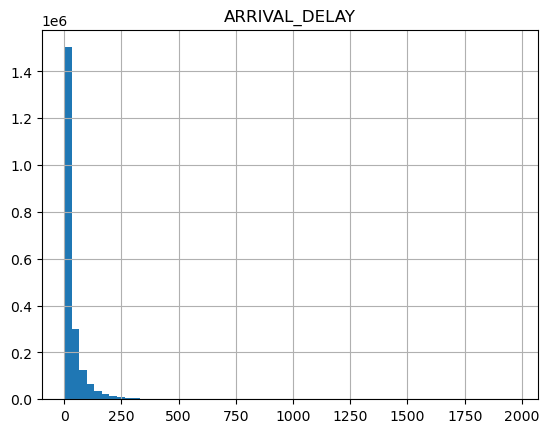

In [56]:
df_flight.hist(column='ARRIVAL_DELAY', bins=60)

The histogram shows that most of the flight delays are within 1-2 hours.  However, there are 
some extreme cases where the flight delay is over 24 hours.  Let's take a look at some of these
extreme delays to see if they are valid or not.

In [57]:
# 'ARRIVAL_DELAY' columns have some extremely large numbers.  A closer look at these numbers 
# shows they are valid since the delay in those cases exceeded 24 hours.

df_flight[df_flight.ARRIVAL_DELAY>1440].sample(10)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
396544,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,...,186.0,155.0,1313,1344.0,12.0,1210,1356.0,1546.0,0,0
264495,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,...,65.0,42.0,236,1512.0,7.0,1246,1519.0,1593.0,0,0
5538739,12,14,1,AA,1310,N424AA,MSP,ORD,500,716.0,...,87.0,56.0,334,834.0,9.0,646,843.0,1557.0,0,0
1987382,5,7,4,AA,1085,N4XPAA,PNS,DFW,738,756.0,...,124.0,96.0,604,952.0,8.0,944,1000.0,1456.0,0,0
4791253,10,26,1,MQ,3106,N630MQ,11413,11298,1622,1743.0,...,100.0,79.0,674,2013.0,10.0,1924,2023.0,1499.0,0,0
4805551,10,27,2,MQ,3305,N935MQ,11612,13930,1443,1627.0,...,71.0,53.0,272,1726.0,12.0,1610,1738.0,1528.0,0,0
1342320,3,28,6,AA,1168,N3FJAA,FLL,ORD,815,836.0,...,195.0,175.0,1182,1045.0,6.0,1036,1051.0,1455.0,0,0
3776582,8,23,7,AA,270,N5ERAA,HNL,LAX,710,825.0,...,389.0,299.0,2556,1743.0,11.0,1540,1754.0,1574.0,0,0
311492,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,...,167.0,144.0,918,1418.0,9.0,1415,1427.0,1452.0,0,0
949876,3,4,3,AA,270,N5DJAA,HNL,LAX,828,1057.0,...,314.0,282.0,2556,1802.0,9.0,1555,1811.0,1576.0,0,0


Now, let's delete rows irrelevant to the investigation & replace null values for entries we want to keep.

In [58]:
irrelevant = ['DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(irrelevant)]]

In [59]:
# For 'DIVERTED' and 'CANCELLED' flights, replace 'ARRIVAL_DELAY' NaN values with 0.  

df_flight['ARRIVAL_DELAY'] = df_flight['ARRIVAL_DELAY'].fillna(0)
df_flight['ARRIVAL_DELAY'].describe()

count    2.191967e+06
mean     3.152573e+01
std      5.214012e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.400000e+01
75%      3.600000e+01
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [60]:
df_flight.isna().sum()

MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           92513
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
dtype: int64

In [61]:
# The 3 columns with NaN values are nice to have, but not absolutely necessary for the 
# investigation.  We can use scheduled departure time for the purpose of the investigation.  
# Therefore, we don't actually need these 3 columns.

df_flight = df_flight.drop(['TAIL_NUMBER', 'DEPARTURE_TIME', 'ARRIVAL_TIME'], axis=1)

In [62]:
df_flight.isna().sum()
df_flight.sample(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED
1388599,3,31,2,AS,39,MSP,SEA,700,840,4.0,0,0
2018816,5,9,6,AS,730,ANC,SEA,500,915,20.0,0,0
745041,2,19,4,OO,4605,CIU,DTW,625,749,51.0,0,0
2406579,6,2,2,OO,6191,COS,DEN,900,951,13.0,0,0
3378524,7,30,4,OO,2899,FAT,LAX,805,925,1.0,0,0


Since df_flight is such a large data file, we want to make sure that there is no duplicate 
entries.  

In [63]:
# Check duplicate records.

df_flight['index_origin'] = df_flight.groupby(['MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT']).MONTH.transform('idxmin')    
duplicate = df_flight[df_flight.duplicated(subset=['MONTH','DAY','AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT'], keep='first')]

In [64]:
print(duplicate)

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
3883017                 SJU                 1435               1500   

         ARRIVAL_DELAY  DIVERTED  CANCELLED  index_origin  
3883017            0.0         0          1       3883016  


In [65]:
# Checked the duplicated records and confirmed that they are not duplicate dues to 
# different destination airports.

print(df_flight.iloc[[1556755, 1556756]])

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883016      8   29            6      AA            803            STT   
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
3883016                 CLT                 1435               1827   
3883017                 SJU                 1435               1500   

         ARRIVAL_DELAY  DIVERTED  CANCELLED  index_origin  
3883016            0.0         0          1       3883016  
3883017            0.0         0          1       3883016  


Next, we want to merge the 3 files together.  We want the main flight file show the origin 
airport city & state as well as the destination aiport city & state. Also, we want to 
see the airline names in the main file instead of the IATA codes.  

In [66]:
df_flight = df_flight.drop(['index_origin'], axis=1)

In [67]:
# Add 'ORIGIN_AIRPORT' and 'ORIGIN_STATE' to df by left joining df_airport with df.

df_airport = df_airport.drop(['LATITUDE','LONGITUDE', 'COUNTRY','AIRPORT'], axis=1)
df_airport.rename(columns = {'IATA_CODE':'ORIGIN_AIRPORT'}, inplace = True)

df = pd.merge(df_flight, df_airport, how = 'left', on = ['ORIGIN_AIRPORT'])
df.rename(columns = {'CITY':'ORIGIN_CITY', 'STATE':'ORIGIN_STATE'}, inplace = True)

In [68]:
print(df[df['ORIGIN_CITY'].isna()])

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
1703379     10    1            4      AA            260          12892   
1703380     10    1            4      AA           1965          12892   
1703381     10    1            4      DL           2324          14869   
1703382     10    1            4      AA           1051          14771   
1703383     10    1            4      NK            520          12889   
...        ...  ...          ...     ...            ...            ...   
1847911     10   31            6      AA            272          14771   
1847912     10   31            6      B6           1248          12889   
1847913     10   31            6      B6            688          12892   
1847914     10   31            6      B6           1503          12478   
1847915     10   31            6      UA            717          12892   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
1703379               13303             

In [69]:
# The null values are caused by 'IATA_CODE' being a 5-digit-number.  As we know, 
# IATA_CODE is a standard 3-letter-code. Therefore, the 5-digit-numbered IATA_CODE values 
# in the original df_flight file are incorrect and should be replaced.

df = df.fillna('Unknown')

In [70]:
# Repeat the above process for the destination airports.

df_airport.rename(columns = {'ORIGIN_AIRPORT':'DESTINATION_AIRPORT'}, inplace = True)

df = pd.merge(df, df_airport, how = 'left', on = ['DESTINATION_AIRPORT'])
df.rename(columns = {'CITY':'DESTINATION_CITY', 'STATE':'DESTINATION_STATE'}, inplace = True)

df = df.fillna('Unknown')

In [71]:
# Add airline name to the df by left join.

df.rename(columns = {'AIRLINE':'IATA_CODE'}, inplace = True)
df = pd.merge(df, df_airline, how = 'left', on = ['IATA_CODE'])

After merging the 3 files together, let's take a look at the "comprehensive" file we have.

In [72]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191967 entries, 0 to 2191966
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   IATA_CODE            object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
 10  DIVERTED             int64  
 11  CANCELLED            int64  
 12  ORIGIN_CITY          object 
 13  ORIGIN_STATE         object 
 14  DESTINATION_CITY     object 
 15  DESTINATION_STATE    object 
 16  AIRLINE              object 
dtypes: float64(1), int64(8), object(8)
memory usage: 301.0+ MB


(2191967, 17)

In [73]:
df.sample(10)

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
892481,5,21,4,WN,673,BNA,DCA,1305,1545,10.0,0,0,Nashville,TN,Arlington,VA,Southwest Airlines Co.
292245,2,16,1,DL,1675,IAH,ATL,1357,1653,9.0,0,0,Houston,TX,Atlanta,GA,Delta Air Lines Inc.
1618015,9,11,5,WN,1417,LAS,BUR,1500,1605,44.0,0,0,Las Vegas,NV,Burbank,CA,Southwest Airlines Co.
995578,6,7,7,NK,403,ATL,FLL,1851,2046,7.0,0,0,Atlanta,GA,Ft. Lauderdale,FL,Spirit Air Lines
1841884,10,30,5,AS,467,12892,14747,1535,1815,3.0,0,0,Unknown,Unknown,Unknown,Unknown,Alaska Airlines Inc.
1917967,11,15,7,AA,1276,DFW,RSW,1030,1358,5.0,0,0,Dallas-Fort Worth,TX,Ft. Myers,FL,American Airlines Inc.
95465,1,12,1,EV,5791,LFT,IAH,1528,1635,65.0,0,0,Lafayette,LA,Houston,TX,Atlantic Southeast Airlines
1280409,7,16,4,WN,585,PDX,LAS,1940,2150,20.0,0,0,Portland,OR,Las Vegas,NV,Southwest Airlines Co.
786637,5,4,1,OO,6301,SNA,SFO,1249,1419,9.0,0,0,Santa Ana,CA,San Francisco,CA,Skywest Airlines Inc.
118920,1,16,5,WN,3757,LAX,MDW,1350,1950,8.0,0,0,Los Angeles,CA,Chicago,IL,Southwest Airlines Co.


The file looks good.  However, note that the file is very large, containing a total of 2191967
rows.  Do we really need all these data?  Since the majority of late delivery claims are
for shipments heading to the west coast (i.e. California, Oregon & Washington), it makes sense
for us to focus on those destination airports located in and flights destined to the three west coast 
states.  

In [74]:
# Trim the data to only keep entries with destination airports located in CA, OR and WA.
df = df[(df.DESTINATION_STATE == "CA")|(df.DESTINATION_STATE == "OR" )|(df.DESTINATION_STATE == "WA" )]


After all the data wrangling we've done, let's do a final double check to make sure that all the numbers match and fit, and we have all the data in the way we want them to be.

In [75]:
df.shape

(327211, 17)

In [76]:
df.sample(5)

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
1918042,11,15,7,OO,5490,PSP,SFO,1050,1228,5.0,0,0,Palm Springs,CA,San Francisco,CA,Skywest Airlines Inc.
680149,4,14,2,AS,315,SFO,SEA,1545,1749,14.0,0,0,San Francisco,CA,Seattle,WA,Alaska Airlines Inc.
1505355,8,19,3,AS,567,LAX,PDX,2115,2333,2.0,0,0,Los Angeles,CA,Portland,OR,Alaska Airlines Inc.
1653874,9,19,6,B6,133,BOS,SFO,820,1154,47.0,0,0,Boston,MA,San Francisco,CA,JetBlue Airways
388331,2,28,6,WN,4308,DAL,LAX,1015,1140,13.0,0,0,Dallas,TX,Los Angeles,CA,Southwest Airlines Co.


In [77]:
delayed = np.count_nonzero(df['ARRIVAL_DELAY'])
diverted = df['DIVERTED'].sum()
cancelled = df['CANCELLED'].sum()

print('Total Delayed:', delayed)
print('Total Diverted:', diverted)
print('Total Cancelled:', cancelled)
print((delayed + diverted + cancelled) == 327211)

Total Delayed: 316749
Total Diverted: 1486
Total Cancelled: 8976
True


Before we move on to the Data Exploratory Analysis phase of this project, let's save the
cleaned and sorted database to the local drive, so that it can be imported again in the
next phase of our project in a separate jupyter notebook.

In [78]:
df.to_csv("df_DataWrangling.csv")